# Method comparison and Bland-Altman Analysis
Assume for a specific type of measurement, there are two methods for performing it. A common question in this context is if both methods could replace each other. Therefore, similarity of measurements is investigated. One method for this is Bland-Altman analysis called after Martin Bland and Douglas Altman. 

See also
[Altman and Bland: Measurement in Medicine: the Analysis of Method Comparison Studies](https://www-users.york.ac.uk/~mb55/meas/ab83.pdf)

Before running this notebook, install the following packages:

* [scipy](https://scipy.org/)
* [statsmodels](https://www.statsmodels.org/stable/index.html)

Adapted from Anna Poetsch ([source](https://github.com/BiAPoL/Bio-image_Analysis_with_Python/blob/main/07_descriptive_statistics/04_Bland_altman_analysis.ipynb))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

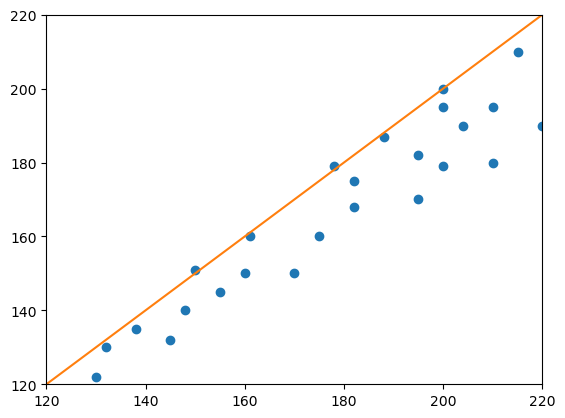

In [6]:
# new measurements
measurement_1 = [130, 132, 138, 145, 148, 150, 155, 160, 161, 170, 175, 178, 182, 182, 188, 195, 195, 200, 200, 204, 210, 210, 215, 220, 200]
measurement_2 = [122, 130, 135, 132, 140, 151, 145, 150, 160, 150, 160, 179, 168, 175, 187, 170, 182, 179, 195, 190, 180, 195, 210, 190, 200]

# scatter plot
plt.plot(measurement_1, measurement_2, "o")
plt.plot([120, 220], [120, 220])
plt.axis([120, 220, 120, 220])
plt.show()

In [7]:
# Determining Pearson's correlation coefficient r with a for-loop
import numpy as np

# get the mean of the measurements
mean_1 = np.mean(measurement_1)
mean_2 = np.mean(measurement_2)

# get the number of measurements
n = len(measurement_1)

# get the standard deviation of the measurements
std_dev_1 = np.std(measurement_1)
std_dev_2 = np.std(measurement_2)

# sum the expectation of 
sum = 0
for m_1, m_2 in zip(measurement_1, measurement_2):
    sum = sum + (m_1 - mean_1) * (m_2 - mean_2) / n

r = sum / (std_dev_1 * std_dev_2)

print ("r = " + str(r))

r = 0.9435300113035253


In [8]:
# Determine Pearson's r using scipy
from scipy import stats

stats.pearsonr(measurement_1, measurement_2)[0]

0.9435300113035255

# Bland-Altman plots
Bland-Altman plots are a way to visualize differences between paired measurements specifically. When googling for python code that draws such plots, one can end up with this solution:

In [9]:
# A function for drawing Bland-Altman plots
# source https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--', c='orange', label=r'+ 1.96$\sigma$')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--', c='magenta', label=r'- 1.96$\sigma$')
    plt.legend()
    plt.xlabel("Average")
    plt.ylabel("Difference")

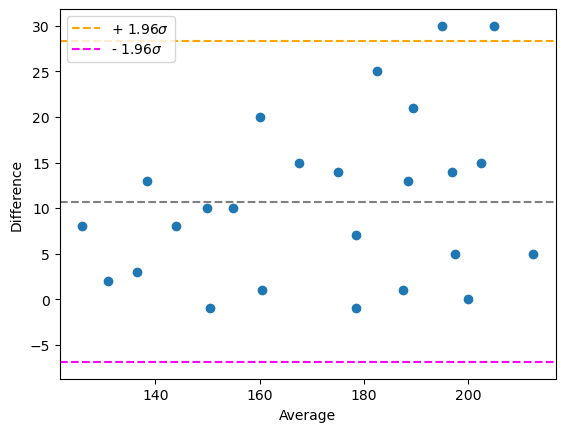

In [10]:
# draw a Bland-Altman plot
bland_altman_plot(measurement_1, measurement_2)
plt.show()

Alternatively, one can use more advanced visualizations using statsmodels (`pip install statsmodels`). It needs numpy-arrays to work with and doesn't work with lists.

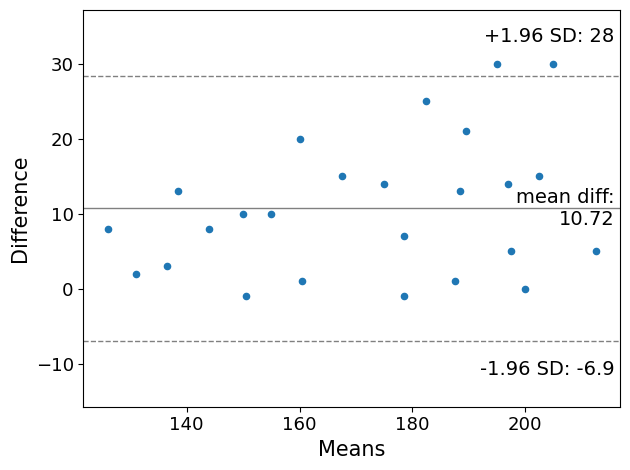

In [11]:
from statsmodels.graphics.agreement import mean_diff_plot

m1 = np.asarray(measurement_1)
m2 = np.asarray(measurement_2)

plot = mean_diff_plot(m1, m2)

## Some simulated situations
For simulating some characteristic bland altman plots, we start by setting a ground truth set of numbers, e.g. radii in mm of 100 cherries.

In [12]:
radii = np.random.normal(15, scale=1, size=(100))

# for demo purposes: print the first 5
print(radii[:5])

[14.24177821 16.20841584 13.92014335 15.02919871 13.18000739]


We assume these radii are the perfect ground truth. We will now measure the size of these cherries twice. Our measurement device is not perfect and thus, has a little error.

In [13]:
measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100))

print(measurement_r1[:5])
print(measurement_r2[:5])

[14.68285507 15.56632    14.29800755 14.67622638 13.80484713]
[13.99560311 17.07692381 14.1803845  15.02369335 13.02208326]


Plotting these two measurements against each other in a Bland-Altman plot visualizes the agreement between the methods. Note the symmetry of the plot and that the data points are arranged around difference = 0. 

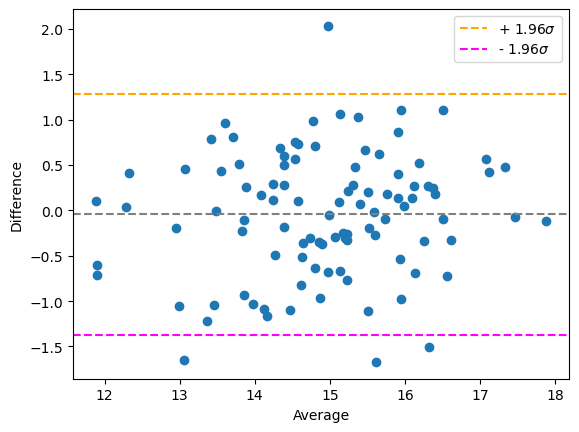

In [14]:
bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

### Additive bias
If one method tends to measure more than the other method by a fixed offset, we call that an additive bias:

In [15]:
offset = 1

measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100)) + offset

print(measurement_r1[:5])
print(measurement_r2[:5])

[14.59435321 15.35641134 14.14844843 15.51343634 12.68685903]
[15.78157031 17.17752145 15.24547858 16.41070381 14.51073123]


You can observe the offset in the Bland-Altman plot because the measurements are arranged around difference = offset:

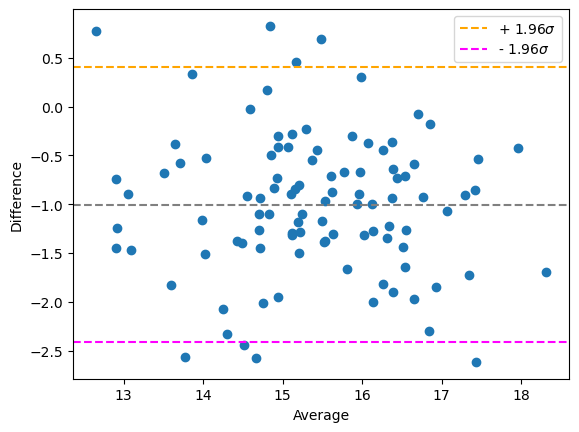

In [16]:
bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

### Multiplicative bias
If one method always measures more than the other linearily depending on the measurement itself, we call that a multiplicative bias.

In [17]:
factor = 1.1

measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100)) * factor

print(measurement_r1[:5])
print(measurement_r2[:5])

[14.89562962 16.54400292 14.14907105 14.94583762 13.03638946]
[15.29793478 16.16504215 13.21210776 15.03700252 13.72178155]


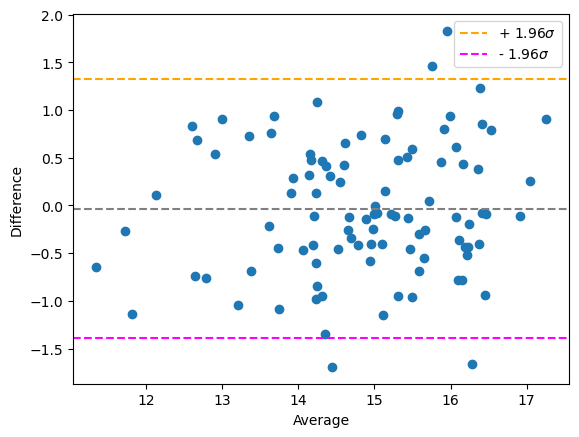

In [18]:
bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

As the effect is harder to see, we use a higher factor.

[14.53183782 15.69039334 14.24592791 14.49140603 13.28029871]
[16.90801151 25.25274655 16.87634905 18.05211977 16.36020682]


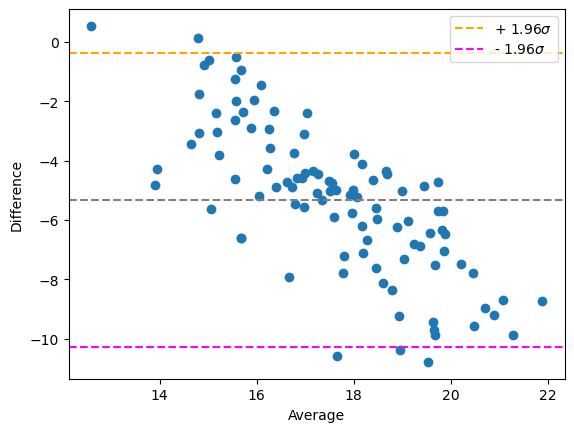

In [19]:
factor = 5

measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100)) * factor + 5

print(measurement_r1[:5])
print(measurement_r2[:5])

bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

## Exercise
Process the banana dataset again, e.g. using a for-loop that goes through the folder `../data/banana/`, and processes all the images. Measure the size of the banana slices using the [scikit-image thresholding methods](https://scikit-image.org/docs/dev/search.html?q=threshold_&check_keywords=yes&area=default#) `threshold_otsu` and `threshold_yen`. Compare both methods using the techniques you learned above.